In [3]:
from aesim.simba import Design, ProjectRepository, Status
import control, math, os 
import numpy as np
import matplotlib.pyplot as plt

# AC Sweep Tests: validating SIMBA AC Sweep Analysis with analytical transfer functions

Examples and analytical equations are derived from from the book [*Transfer Functions of Switching Converters*](https://stairwaypress.com/product/transfer-functions-of-switching-converters/) by Christophe P. Basso.

## Buck Converter in CCM

### Open Loop, control to output transfer function

Success: True
Runtime: 1.237s


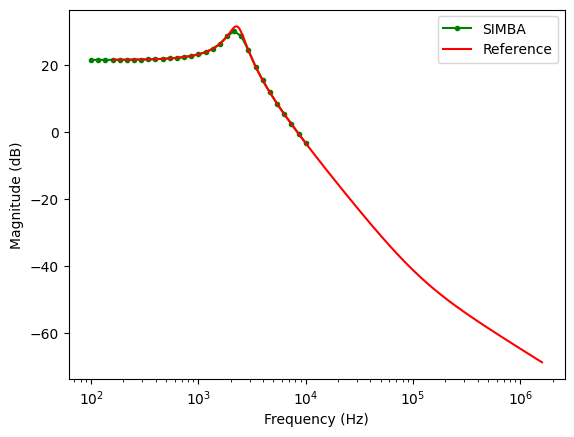

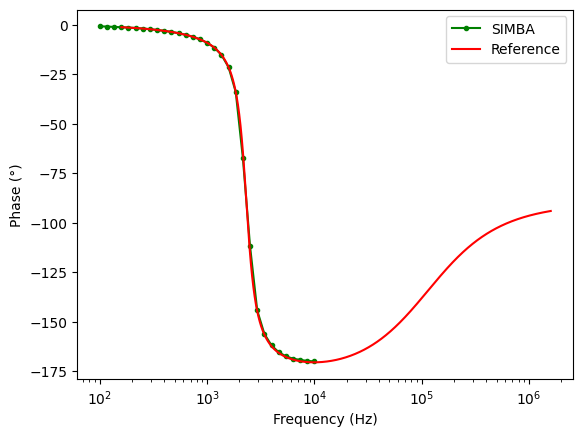

In [4]:
Vin = 12;
L1 = 100E-6;
rl = 10E-3;
rc = 30E-3;
C2 = 47E-6;
Rload = 5;
Fsw = 100E3;

### Analytical 
tf2 = Vin * (Rload / (rl + Rload)) * control.tf ([rc * C2, 1] , [L1*C2*(rc + Rload)/(rl + Rload), L1 / ( rl + Rload) + C2*(rl*Rload/(rl + Rload) + rc), 1])
mag_ref, phase_ref, omega_ref = control.bode_plot(tf2, plot=False);
frequency_ref = np.multiply(omega_ref, 1 / (2*math.pi) )
mag_ref = 20*np.log10(mag_ref);
phase_ref  = np.multiply(phase_ref, 180 / (math.pi) )

### Simulation
file_path = os.path.join(os.getcwd(), "ACSweepTest.jsimba")
project = ProjectRepository(file_path)
design = project.GetDesignByName('Buck Converter - CCM - Open Loop')
design.Circuit.GetDeviceByName('Vin').Value = Vin;
design.Circuit.GetDeviceByName('L1').Value = L1;
design.Circuit.GetDeviceByName('rl').Value = rl;
design.Circuit.GetDeviceByName('C2').Value = C2;
design.Circuit.GetDeviceByName('Rload').Value = Rload;
design.Circuit.GetDeviceByName('Fsw').Frequency = Fsw;
acsweep =  project.GetACSweepByName('AC Sweep - Buck CCM - Open Loop');
acsweep.Design = design;
acsweep.Fmin = Fsw/1000;
acsweep.Fmax = Fsw/10;
acsweep.MagMin  = 0.03;
acsweep.MagMax  = 0.05;
acsweep.NumberOfPoints  = 31;
job = acsweep.NewJob();
status = job.Run();
print("Success: " + str(status==Status.OK))
print("Runtime: " + "{:.3f}".format(job.RunTime) + "s")
mag_sim = job.GetSignalByName('Rload - Voltage Magnitude').DataPoints
phase_sim = job.GetSignalByName('Rload - Voltage Angle').DataPoints
frequency_sim = job.FrequencyPoints

### Plot
plt.figure()
plt.semilogx(frequency_sim, mag_sim, 'g.-', label='SIMBA')    # Bode magnitude plot
plt.semilogx(frequency_ref, mag_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.figure()
plt.semilogx(frequency_sim, phase_sim, 'g.-', label='SIMBA')  # Bode phase plot
plt.semilogx(frequency_ref, phase_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (°)')
plt.legend()
plt.show()


### Open Loop, input to output transfer function

Success: True
Runtime: 1.257s


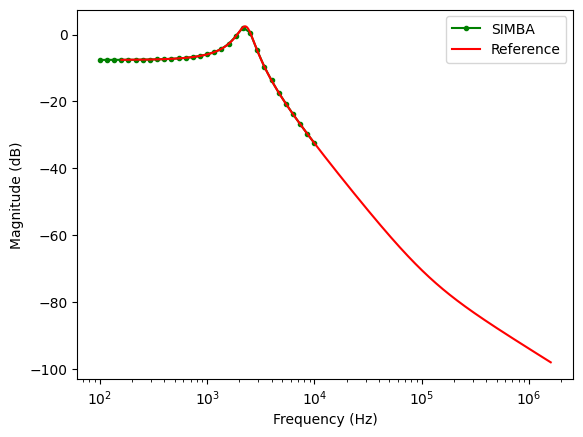

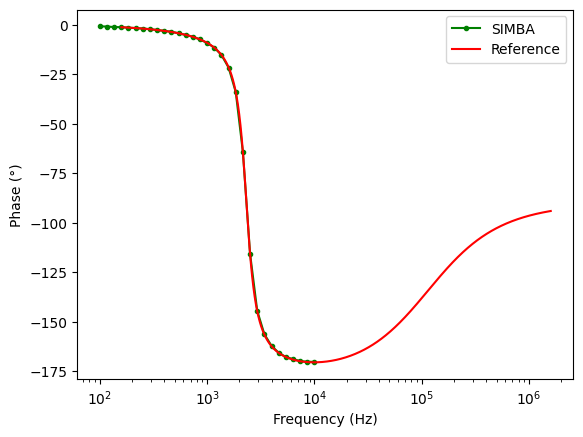

In [5]:
Vin = 12;
L1 = 100E-6;
rl = 10E-3;
rc = 30E-3;
C2 = 47E-6;
Rload = 5;
Fsw = 100E3;
D0 = 0.417 

### Analytical 
H0 = D0 * Rload / (rl + Rload)
wz = 1 / (rc * C2)
tf = H0 * control.tf ([1/wz, 1] , [L1*C2*(rc + Rload)/(rl + Rload), L1 / ( rl + Rload) + C2*(rl*Rload/(rl + Rload) + rc), 1])
mag_ref, phase_ref, omega_ref = control.bode_plot(tf, plot=False);
frequency_ref = np.multiply(omega_ref, 1 / (2*math.pi) )
mag_ref = 20*np.log10(mag_ref);
phase_ref  = np.multiply(phase_ref, 180 / (math.pi) )

### Simulation
file_path = os.path.join(os.getcwd(), "ACSweepTest.jsimba")
project = ProjectRepository(file_path)
design = project.GetDesignByName('Buck Converter - CCM - Open Loop')
design.Circuit.GetDeviceByName('Vin').Value = Vin;
design.Circuit.GetDeviceByName('L1').Value = L1;
design.Circuit.GetDeviceByName('rl').Value = rl;
design.Circuit.GetDeviceByName('C2').Value = C2;
design.Circuit.GetDeviceByName('Rload').Value = Rload;
design.Circuit.GetDeviceByName('Fsw').Frequency = Fsw;
acsweep =  project.GetACSweepByName('AC Sweep - Buck CCM - Input To Output');
acsweep.Design = design;
acsweep.Fmin = Fsw/1000;
acsweep.Fmax = Fsw/10;
acsweep.BaseSwitchingFrequency = Fsw;
acsweep.BaseSwitchingFrequencyEnabled = False;
acsweep.MagMin  = 0.5;
acsweep.MagMax  = 0.5;
acsweep.NumberOfPoints  = 31;
job = acsweep.NewJob();
status = job.Run();
print("Success: " + str(status==Status.OK))
print("Runtime: " + "{:.3f}".format(job.RunTime) + "s")
mag_sim = job.GetSignalByName('Rload - Voltage Magnitude').DataPoints
phase_sim = job.GetSignalByName('Rload - Voltage Angle').DataPoints
frequency_sim = job.FrequencyPoints

### Plot
plt.figure()
plt.semilogx(frequency_sim, mag_sim, 'g.-', label='SIMBA')    # Bode magnitude plot
plt.semilogx(frequency_ref, mag_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.figure()
plt.semilogx(frequency_sim, phase_sim, 'g.-', label='SIMBA')  # Bode phase plot
plt.semilogx(frequency_ref, phase_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (°)')
plt.legend()
plt.show()


### Open Loop, input Impedance

Success: True
Runtime: 2.299s


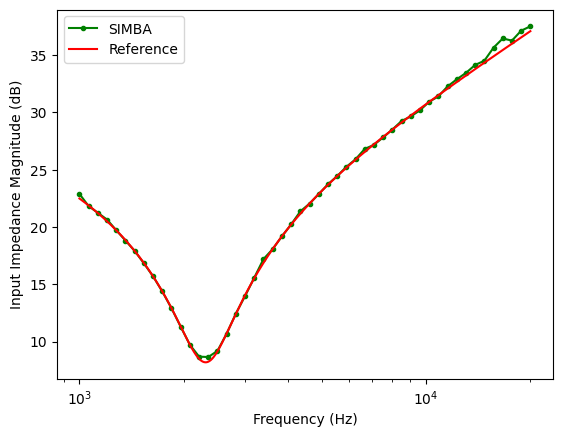

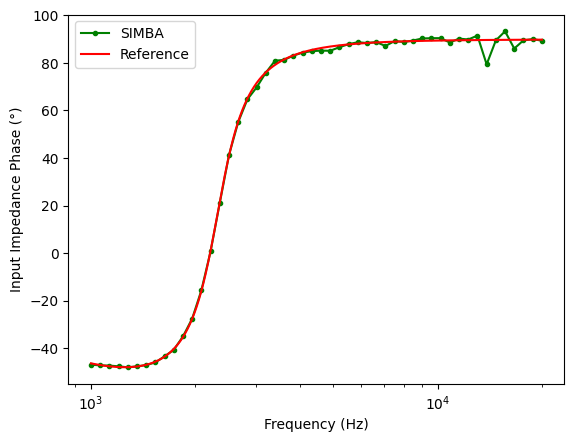

In [6]:
Vin = 12;
L1 = 100E-6;
rl = 10E-3;
rc = 30E-3;
C2 = 47E-6;
Rload = 5;
Fsw = 100E3;
D0 = 0.417 
Fmin = 1000;
Fmax = 20000;


### Analytical
R0 = (rl + Rload) / (D0**2)
W0 = (1/np.sqrt(L1*C2))*np.sqrt((rl + Rload) / (rc + Rload))
WP = 1/(C2 * (rl + Rload)) 
Q = (L1*C2*W0*(rc+Rload))/(L1+C2*(rl*rc+rl*Rload+rc*Rload))
tf = R0 * control.tf ([(1/W0)**2,1/(W0*Q), 1] , [1/WP, 1])

omega_min = 2 * np.pi * Fmin  # Minimum angular frequency
omega_max = 2 * np.pi * Fmax  # Maximum angular frequency
omega = np.logspace(np.log10(omega_min), np.log10(omega_max), num=1000)

imp_ref, phase_ref, omega_ref = control.bode_plot(tf, omega=omega, plot=False)

frequency_ref = np.multiply(omega_ref, 1 / (2*math.pi) )
imp_ref = 20*np.log10(imp_ref);
phase_ref  = np.multiply(phase_ref, 180 / (math.pi) )

### Simulation
file_path = os.path.join(os.getcwd(), "ACSweepTest.jsimba")
project = ProjectRepository(file_path)
design = project.GetDesignByName('Buck Converter - CCM - Open Loop')
design.Circuit.GetDeviceByName('Vin').Value = Vin;
design.Circuit.GetDeviceByName('L1').Value = L1;
design.Circuit.GetDeviceByName('rl').Value = rl;
design.Circuit.GetDeviceByName('C2').Value = C2;
design.Circuit.GetDeviceByName('Rload').Value = Rload;
design.Circuit.GetDeviceByName('Fsw').Frequency = Fsw;
acsweep =  project.GetACSweepByName('AC Sweep - Buck CCM - Input Impedance');
acsweep.Design = design;
acsweep.Fmin = Fmin;
acsweep.Fmax = Fmax;
acsweep.BaseSwitchingFrequency = Fsw;
acsweep.BaseSwitchingFrequencyEnabled = False;
acsweep.MagMin  = 1;
acsweep.MagMax  = 1;
acsweep.NumberOfPoints  = 50;
job = acsweep.NewJob();
status = job.Run();
print("Success: " + str(status==Status.OK))
print("Runtime: " + "{:.3f}".format(job.RunTime) + "s")
mag_sim_db = job.GetSignalByName('A1 - Current Magnitude').DataPoints
phase_sim = job.GetSignalByName('A1 - Current Angle').DataPoints
frequency_sim = job.FrequencyPoints


### mag_sim_db and phase_sim are the transfer function of I/V. We need to convert them to complex number and invert it to get the impedance
tf_sim = np.zeros(len(mag_sim_db), dtype=complex)
for i in range(len(mag_sim_db)):
    tf_sim[i] = 10**(mag_sim_db[i]/20) * np.exp(1j*math.radians(phase_sim[i]))

### invert the transfer function to get the impedance
Z_sim = np.zeros(len(tf_sim), dtype=complex)
for i in range(len(tf_sim)):
    Z_sim[i] = 1/tf_sim[i]

### Get the impedance in db and the phase in degrees
imp_sim = 20 * np.log10(np.abs(Z_sim))
phase_sim = np.angle(Z_sim, deg=True)

### Plot
plt.figure()
plt.semilogx(frequency_sim, imp_sim, 'g.-', label='SIMBA')    # Bode magnitude plot
plt.semilogx(frequency_ref, imp_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Input Impedance Magnitude (dB)')
plt.legend()
plt.figure()
plt.semilogx(frequency_sim, phase_sim, 'g.-', label='SIMBA')  # Bode phase plot
plt.semilogx(frequency_ref, phase_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Input Impedance Phase (°)')
plt.legend()
plt.show()


## Buck Converter in DCM

### Open Loop, control to output transfer function

Success: True
Runtime: 1.852s


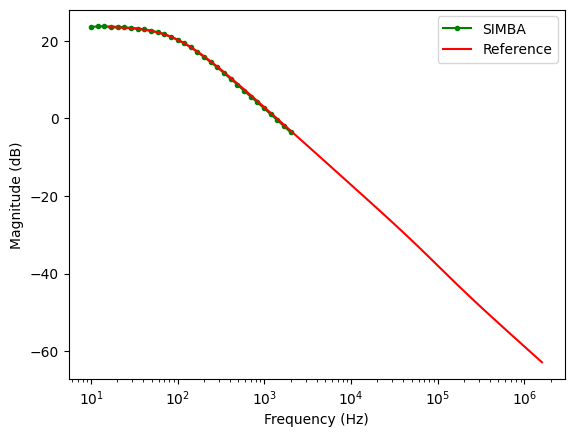

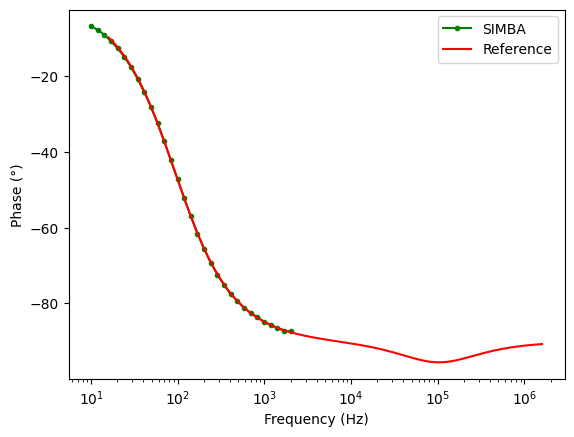

In [7]:
Vin = 12;
L1 = 100E-6;
rl = 10E-3;
rc = 30E-3;
C2 = 47E-6;
Rload = 100;
Fsw = 100E3;
D0 = 0.244 
Vout = 5
### Analytical
Tsw = 1/Fsw
tauL = L1 / (Rload*Tsw)
M= 2 / (1 + math.sqrt(1 + 8*tauL / (D0*D0)))
wp1 = ((2 - M) / ( 1 - M )) * 1 / (C2*Rload)
wp2 = (L1 + C2*Rload*Rload*(1-M)) / (L1 * C2 * Rload)

H0 = (2 * Vout / D0) * (1-M)/(2-M)
wz = 1 / (rc * C2)

tf = H0 * control.tf ([1/wz, 1] , [1/(wp1*wp2),1/wp1 + 1/wp2 , 1])
mag_ref, phase_ref, omega_ref = control.bode_plot(tf, plot=False);
frequency_ref = np.multiply(omega_ref, 1 / (2*math.pi) )
mag_ref = 20*np.log10(mag_ref);
phase_ref  = np.multiply(phase_ref, 180 / (math.pi) )

### Simulation
file_path = os.path.join(os.getcwd(), "ACSweepTest.jsimba")
project = ProjectRepository(file_path)
design = project.GetDesignByName('Buck Converter - DCM - Open Loop')
design.Circuit.GetDeviceByName('Vin').Value = Vin;
design.Circuit.GetDeviceByName('L1').Value = L1;
design.Circuit.GetDeviceByName('rl').Value = rl;
design.Circuit.GetDeviceByName('C2').Value = C2;
design.Circuit.GetDeviceByName('Rload').Value = Rload;
design.Circuit.GetDeviceByName('Fsw').Frequency = Fsw;
design.Circuit.GetDeviceByName('duty cycle').Value = D0;

acsweep =  project.GetACSweepByName('AC Sweep - Buck DCM - Open Loop');
acsweep.Design = design;
acsweep.Fmin = Fsw/10000;
acsweep.Fmax = Fsw/50;
acsweep.MagMin  = 0.05;
acsweep.MagMax  = 0.1;
acsweep.NumberOfPoints  = 31;
job = acsweep.NewJob();
status = job.Run();
print("Success: " + str(status==Status.OK))
print("Runtime: " + "{:.3f}".format(job.RunTime) + "s")
mag_sim = job.GetSignalByName('Rload - Voltage Magnitude').DataPoints
phase_sim = job.GetSignalByName('Rload - Voltage Angle').DataPoints
frequency_sim = job.FrequencyPoints

### Plot
plt.figure()
plt.semilogx(frequency_sim, mag_sim, 'g.-', label='SIMBA')    # Bode magnitude plot
plt.semilogx(frequency_ref, mag_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.figure()
plt.semilogx(frequency_sim, phase_sim, 'g.-', label='SIMBA')  # Bode phase plot
plt.semilogx(frequency_ref, phase_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (°)')
plt.legend()
plt.show()


### Open Loop, input to output transfer function

Success: True
Runtime: 2.272s


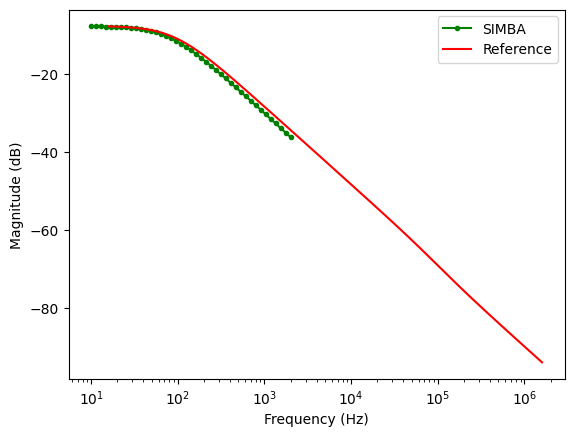

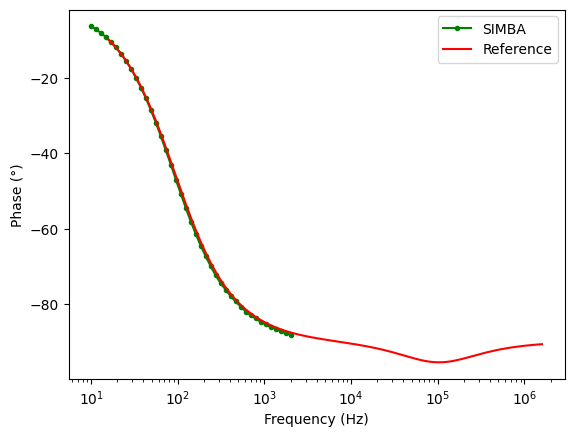

In [8]:
Vin = 12;
L1 = 100E-6;
rl = 10E-3;
rc = 30E-3;
C2 = 47E-6;
Rload = 100;
Fsw = 100E3;
D0 = 0.244 

### Analytical
Tsw = 1/Fsw
tauL = L1 / (Rload*Tsw)
H0 = 2 / (1 + math.sqrt(1+(8*tauL/(D0*D0))))
wz = 1 / (rc * C2)
M= 2 / (1 + math.sqrt(1 + 8*tauL / (D0*D0)))
wp1 = ((2 - M) / ( 1 - M )) * 1 / (C2*Rload)
wp2 = (L1 + C2*Rload*Rload*(1-M)) / (L1 * C2 * Rload)
tf = H0 * control.tf ([1/wz, 1] , [1/(wp1*wp2),1/wp1 + 1/wp2 , 1])
mag_ref, phase_ref, omega_ref = control.bode_plot(tf, plot=False);
frequency_ref = np.multiply(omega_ref, 1 / (2*math.pi) )
mag_ref = 20*np.log10(mag_ref);
phase_ref  = np.multiply(phase_ref, 180 / (math.pi) )

### Simulation
file_path = os.path.join(os.getcwd(), "ACSweepTest.jsimba")
project = ProjectRepository(file_path)
design = project.GetDesignByName('Buck Converter - DCM - Open Loop')
design.Circuit.GetDeviceByName('Vin').Value = Vin;
design.Circuit.GetDeviceByName('L1').Value = L1;
design.Circuit.GetDeviceByName('rl').Value = rl;
design.Circuit.GetDeviceByName('C2').Value = C2;
design.Circuit.GetDeviceByName('Rload').Value = Rload;
design.Circuit.GetDeviceByName('Fsw').Frequency = Fsw;
design.Circuit.GetDeviceByName('duty cycle').Value = D0;

acsweep =  project.GetACSweepByName('AC Sweep - Buck DCM - Input To Output');
acsweep.Design = design;
acsweep.Fmin = Fsw/10000;
acsweep.Fmax = Fsw/50;
acsweep.MagMin  = 5;
acsweep.MagMax  = 10;
acsweep.NumberOfPoints  = 41;
job = acsweep.NewJob();
status = job.Run();
print("Success: " + str(status==Status.OK))
print("Runtime: " + "{:.3f}".format(job.RunTime) + "s")
mag_sim = job.GetSignalByName('Rload - Voltage Magnitude').DataPoints
phase_sim = job.GetSignalByName('Rload - Voltage Angle').DataPoints
frequency_sim = job.FrequencyPoints

### Plot
plt.figure()
plt.semilogx(frequency_sim, mag_sim, 'g.-', label='SIMBA')    # Bode magnitude plot
plt.semilogx(frequency_ref, mag_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.figure()
plt.semilogx(frequency_sim, phase_sim, 'g.-', label='SIMBA')  # Bode phase plot
plt.semilogx(frequency_ref, phase_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (°)')
plt.legend()
plt.show()


## Boost Converter in CCM

### Open Loop, control to output transfer function

Success: True
Runtime: 1.432s


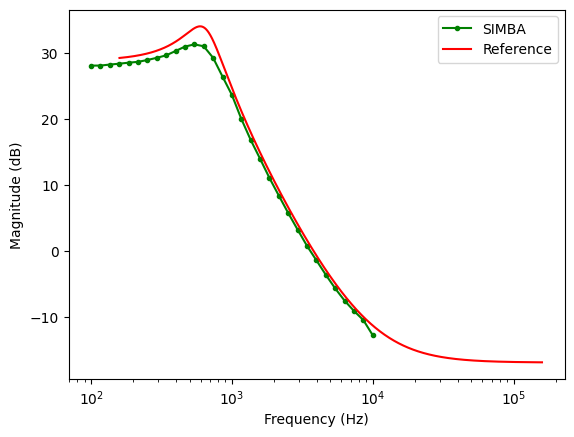

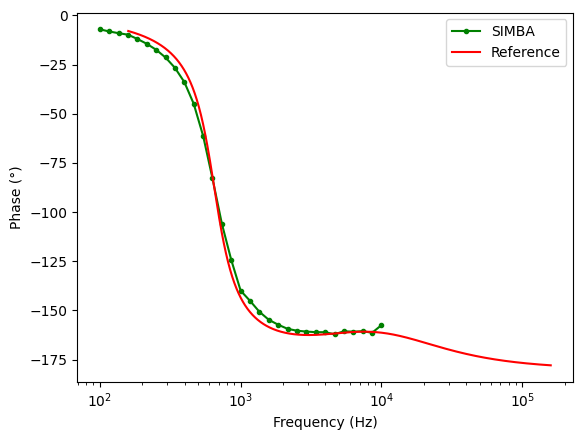

In [9]:
Vin = 10;
L1 = 47E-6;
rl = 0.1;
rc = 50E-3;
C2 = 470E-6;
Rload = 10;
Fsw = 100E3;
D = 0.4
### Analytical 
H0 = Vin / (( 1 - D)**2) 
wz1 = 1 / ( rc * C2)
wz2 = (Rload * ( 1 - D)**2) / L1
w0 = (1/math.sqrt(L1*C2)) * math.sqrt((rl + Rload*( 1 - D)**2)/(rc + Rload))
Q = w0 / ( (rl/L1) + 1/(C2*(rc+Rload))) 
tf = H0 * control.tf ( [-1/(wz1*wz2),1/wz1 - 1/wz2 , 1],  [1/(w0**2), 1/(w0*Q), 1])
mag_ref, phase_ref, omega_ref = control.bode_plot(tf, plot=False);
frequency_ref = np.multiply(omega_ref, 1 / (2*math.pi) )
mag_ref = 20*np.log10(mag_ref);
phase_ref  = np.multiply(phase_ref, 180 / (math.pi) )

### Simulation
file_path = os.path.join(os.getcwd(), "ACSweepTest.jsimba")
project = ProjectRepository(file_path)
design = project.GetDesignByName('Boost Converter - CCM - Open Loop')
design.Circuit.GetDeviceByName('Vin').Value = Vin;
design.Circuit.GetDeviceByName('L1').Value = L1;
design.Circuit.GetDeviceByName('rl').Value = rl;
design.Circuit.GetDeviceByName('C2').Value = C2;
design.Circuit.GetDeviceByName('Rload').Value = Rload;
design.Circuit.GetDeviceByName('Fsw').Frequency = Fsw;
acsweep =  project.GetACSweepByName('AC Sweep - Boost CCM - Open Loop');
acsweep.Design = design;
acsweep.Fmin = Fsw/1000;
acsweep.Fmax = Fsw/10;
acsweep.MagMin  = 0.001;
acsweep.MagMax  = 0.01;
acsweep.NumberOfPoints  = 31;
job = acsweep.NewJob();
status = job.Run();
print("Success: " + str(status==Status.OK))
print("Runtime: " + "{:.3f}".format(job.RunTime) + "s")
mag_sim = job.GetSignalByName('Rload - Voltage Magnitude').DataPoints
phase_sim = job.GetSignalByName('Rload - Voltage Angle').DataPoints
frequency_sim = job.FrequencyPoints

### Plot
plt.figure()
plt.semilogx(frequency_sim, mag_sim, 'g.-', label='SIMBA')    # Bode magnitude plot
plt.semilogx(frequency_ref, mag_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.figure()
plt.semilogx(frequency_sim, phase_sim, 'g.-', label='SIMBA')  # Bode phase plot
plt.semilogx(frequency_ref, phase_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (°)')
plt.legend()
plt.show()

## Flyyback Converter in CCM

### Open Loop, control to output transfer function

Success: True
Runtime: 1.842s


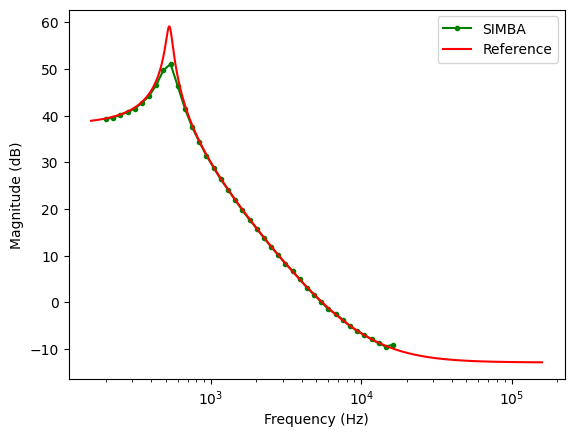

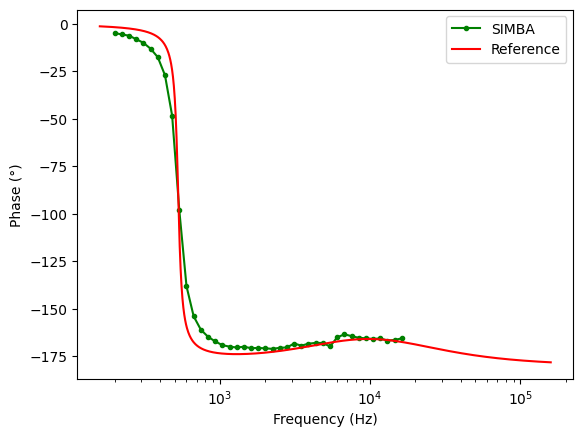

In [10]:
Vin = 90;
Lp = 600E-6;
rc = 30E-3;
C1 = 680E-6;
Rload = 5;
Fsw = 65E3;
D = 0.470
N = -0.250

### Analytical 
H0 =-1* N*Vin / (( 1 - D)**2 )
wz1 = 1 / ( rc * C1)
wz2 = (Rload * ( 1 - D)**2) / (D*Lp * N**2)
w0 = (1-D)/(N*math.sqrt(Lp*C1))
Q = ((1-D) / N) *Rload*math.sqrt(C1/Lp);
tf = H0 * control.tf ( [-1/(wz1*wz2),1/wz1 - 1/wz2 , 1],  [1/(w0**2), 1/(w0*Q), 1])
mag_ref, phase_ref, omega_ref = control.bode_plot(tf, plot=False);
frequency_ref = np.multiply(omega_ref, 1 / (2*math.pi) )
mag_ref = 20*np.log10(mag_ref);
phase_ref  = np.multiply(phase_ref, 180 / (math.pi) )

### Simulation
file_path = os.path.join(os.getcwd(), "ACSweepTest.jsimba")
project = ProjectRepository(file_path)
design = project.GetDesignByName('Flyback Converter - CCM - Open Loop')
design.Circuit.GetDeviceByName('Vin').Value = Vin;
design.Circuit.GetDeviceByName('Lp').Value = Lp;
design.Circuit.GetDeviceByName('C1').Value = C1;
design.Circuit.GetDeviceByName('Rload').Value = Rload;
design.Circuit.GetDeviceByName('D').Value = D;
design.Circuit.GetDeviceByName('Fsw').Frequency = Fsw;
design.Circuit.GetDeviceByName('TX1').Ratio = N;

acsweep =  project.GetACSweepByName('AC Sweep - Flyback CCM - Open Loop');
acsweep.Design = design;
acsweep.Fmin = 200;
acsweep.Fmax = Fsw/4;
acsweep.MagMin  = 0.001;
acsweep.MagMax  = 0.01;
acsweep.NumberOfPoints  = 41;
job = acsweep.NewJob();
status = job.Run();
print("Success: " + str(status==Status.OK))
print("Runtime: " + "{:.3f}".format(job.RunTime) + "s")
mag_sim = job.GetSignalByName('Rload - Voltage Magnitude').DataPoints
phase_sim = job.GetSignalByName('Rload - Voltage Angle').DataPoints
frequency_sim = job.FrequencyPoints

### Plot
plt.figure()
plt.semilogx(frequency_sim, mag_sim, 'g.-', label='SIMBA')    # Bode magnitude plot
plt.semilogx(frequency_ref, mag_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.figure()
plt.semilogx(frequency_sim, phase_sim, 'g.-', label='SIMBA')  # Bode phase plot
plt.semilogx(frequency_ref, phase_ref, 'r', label='Reference')    # Bode magnitude plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (°)')
plt.legend()
plt.show()